# Importing some utilities

In [1]:
%cd ../..
import glob
import sys
from dmg.realism.mle import whichFitsBetter
from scripts.modelSet import datasets_supported
msetObject = datasets_supported['yakindu-github']
train_path = 'data/yakindu-github/train'
backend = 'python'

/home/antolin/wakame/DMG-Python


# Loading Training set

In [2]:
Gs = [msetObject.getGraphReal(f,backend) 
                for f in glob.glob(train_path + "/*")]

# Random EMF

For each rule in RandomEMF, depending on the type of rule, we estimate its parameters. More concretely, for shapes we use the function `whichFitsBetter` that selects the best distribuntion by using maximum likeihood. For priorities in alternative rules, the procedure described in the paper is done and it is based on counting each different alternative in the set $R_{II}$.

## Number of regions per statechart

For the rule:

```
Root : Statechart ->
		regions += RegionsStatechart#Distribution(parameters)
	; 
```

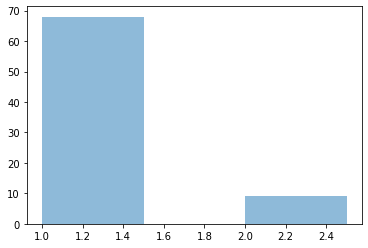

In [3]:
import matplotlib.pyplot as plt
import numpy as np

nums = []
for G in Gs:
    nums.append(G.out_degree(0))
bins = np.arange(1, 3, 0.5)
plt.hist(nums, bins = bins, alpha=0.5, density = False)
print()

In [4]:
whichFitsBetter(nums)

Optimization terminated successfully.
         Current function value: 0.283499
         Iterations: 18
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 1.074438
         Iterations: 11
         Function evaluations: 22


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'uniform', 'params': (1, 2)}

## Number of regions per state

For the rule:

```
	RState (Region r) : State ->
		regions += RegionsState#Distribution(parameters)
	;
	
```

(array([0.89716312, 0.08510638, 0.0070922 , 0.0035461 , 0.0035461 ,
        0.        , 0.0035461 , 0.        , 0.        ]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

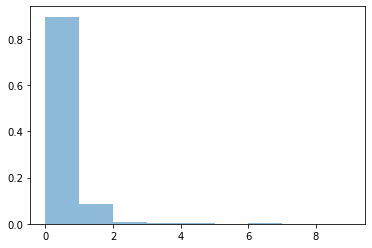

In [5]:
numberSubvertex = []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='State':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'regions'):
                        cont = cont + 1
            numberSubvertex.append(cont)
            
bins = np.arange(0, 10, 1)
plt.hist(numberSubvertex, bins = bins, alpha=0.5, density = True)

In [6]:
best = whichFitsBetter(numberSubvertex)
print(best)
#print(r,p)
#print(best)

Optimization terminated successfully.
         Current function value: 0.415573
         Iterations: 26
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 0.831163
         Iterations: 16
         Function evaluations: 33
Optimization terminated successfully.
         Current function value: 0.471621
         Iterations: 8
         Function evaluations: 16
{'dis': 'poisson', 'params': 0.1453900709219858}


## Type of vertices

For the rule:

```
	alter Vertices (Region r) : Vertex ->
		 RPseudoState(r)#a | RRegularState(r)#b
	;
	
```

In [7]:
import numpy as np
ps = []
for G in Gs:
    p = [0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'FinalState'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'State'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'Synchronization'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Choice'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Exit'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Entry'):
            p[1] = p[1] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)
print(np.mean(ps, axis = 0)/np.min(np.mean(ps, axis = 0)))

[1.98176941 1.        ]


For the rule:

```
	alter RRegularState (Region r) : RegularState ->
		RFinal#a | RState(r)#b 
	;
	
```

In [8]:
ps = []
for G in Gs:
    p = [0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'FinalState'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'State'):
            p[1] = p[1] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)
print(np.mean(ps, axis = 0)/np.min(np.mean(ps, axis = 0)))

[ 1.         22.93782383]


For the rule:

```
	alter RPseudoState(Region r) : Pseudostate ->
		 RTypeSynchronization(r)#a  | RTypeExit#b | RTypeChoice(r)#c
		 | if (r.vertices.filter[it instanceof Entry].size == 0 
		 	&& r.vertices.size > 0 
		 ) RTypeEntry(r)#d
	;
	
```

We want to estimate `a`, `b`, `c` and `d`.

In [9]:
ps = []
for G in Gs:
    p = [0, 0, 0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'Synchronization'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'Choice'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Exit'):
            p[2] = p[2] + 1
        if (G.nodes[n]['type'] == 'Entry'):
            p[3] = p[3] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)
print(np.mean(ps, axis = 0))
print(np.mean(ps[:,1:], axis = 0)/np.min(np.mean(ps[:,1:], axis = 0)))

[0.         0.06991342 0.01731602 0.91277056]
[ 4.0375  1.     52.7125]


## Transitions per state

For the rule:

```
	RState (Region r) : State ->
		outgoingTransitions += RTransition(self,r)#Distribution(parameters)
	;
	
```

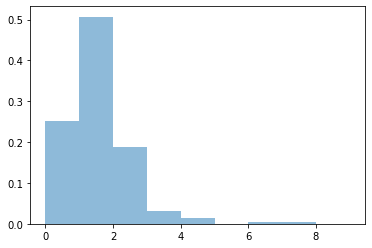

In [10]:
numberTransitions = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'State'):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'outgoingTransitions'):
                        cont = cont + 1
            numberTransitions.append(cont)
bins = np.arange(0, 10, 1)
plt.hist(numberTransitions, bins = bins, alpha=0.5, density = True)
print()

In [11]:
whichFitsBetter(numberTransitions)

Optimization terminated successfully.
         Current function value: 1.368860
         Iterations: 20
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: 1.282858
         Iterations: 11
         Function evaluations: 22


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'poisson', 'params': 1.0815602836879432}

For the rule:

```
	RTypeSynchronization (Region r) : Synchronization ->
		outgoingTransitions += RTransition(self,r)#Distribution(parameters)
	;
	
```

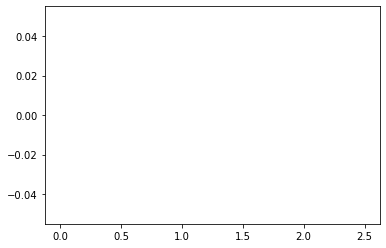

In [12]:
numberTransitions = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Synchronization'):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'outgoingTransitions'):
                        cont = cont + 1
            numberTransitions.append(cont)
bins = np.arange(0, 3, 0.5)
plt.hist(numberTransitions, bins = bins, alpha=0.5, density = False)
print()

In [13]:
whichFitsBetter(numberTransitions)

zero-size array to reduction operation maximum which has no identity
Can not fit negbin
Can not fit normal
Can not fit poisson


ValueError: zero-size array to reduction operation maximum which has no identity

For the rule:

```
	RTypeChoice (Region r) : Choice->
		outgoingTransitions += RTransition(self,r)#Distribution(parameters)
	;
	
```

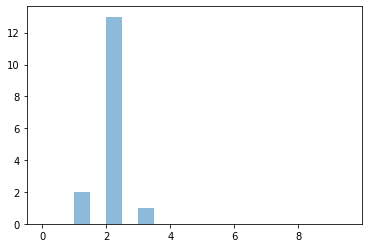

In [14]:
numberTransitions = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Choice'):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'outgoingTransitions'):
                        cont = cont + 1
            numberTransitions.append(cont)
bins = np.arange(0, 10, 0.5)
plt.hist(numberTransitions, bins = bins, alpha=0.5, density = False)
print()

In [15]:
whichFitsBetter(numberTransitions)

Optimization terminated successfully.
         Current function value: 0.571424
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1.331207
         Iterations: 11
         Function evaluations: 22


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'norm', 'params': (1.9375, 0.42847841252506524)}

In [16]:
0.42847841252506524**2

0.18359375

## Number vertex per region

## Statechart

For the rule:

```
	RegionsStatechart : Region ->
		vertices += Vertices(self)#Distribution(parameters)
	;
	
```

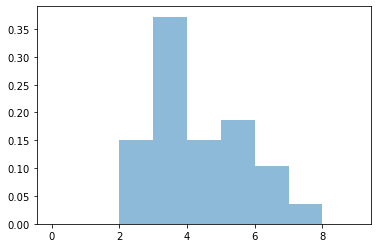

In [17]:
def fromStateChart(G,n):
    for m in G:
        if (G.nodes[m]['type'] == 'Statechart'):
            try:
                for e in G[m][n]:
                    if (G[m][n][e]['type'] == 'regions'):
                        return True
            except:
                return False
    return False

numberVert = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Region') and (fromStateChart(G,n)):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'vertices'):
                        cont = cont + 1
            numberVert.append(cont)
bins = np.arange(0, 10, 1)
plt.hist(numberVert, bins = bins, alpha=0.5, density = True)
print()

In [18]:
print(whichFitsBetter(numberVert))

Optimization terminated successfully.
         Current function value: 1.730549
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1.821253
         Iterations: 12
         Function evaluations: 24
{'dis': 'uniform', 'params': (2, 7)}


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


## State

For the rule:

```
	RegionsState : Region ->
		vertices += Vertices(self)#Distribution(parameters)
	;
	
```

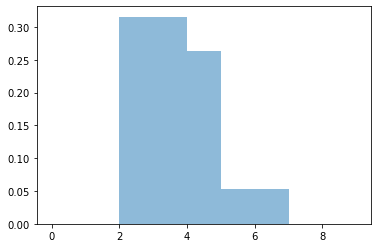

In [19]:
def fromState(G,n):
    for m in G:
        if (G.nodes[m]['type'] == 'State'):
            try:
                for e in G[m][n]:
                    if (G[m][n][e]['type'] == 'regions'):
                        return True
            except:
                return False
    return False

numberVert = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Region') and (fromState(G,n)):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'vertices'):
                        cont = cont + 1
            numberVert.append(cont)
bins = np.arange(0, 10, 1)
plt.hist(numberVert, bins = bins, alpha=0.5, density = True)
print()

In [20]:
whichFitsBetter(numberVert)

Optimization terminated successfully.
         Current function value: 1.517887
         Iterations: 21
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: 1.684943
         Iterations: 12
         Function evaluations: 24


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'uniform', 'params': (2, 6)}